Basic Statistical Description:
         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000

Null values before replacement:
Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

Null values after replacement:
Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64

Aggregated Data:
         Duration     Calories
min     15.000000    50.300000
max    300.000000  1860.400000
count  169.000000   169.000000
mean    63.846154   375.790244

Rows with Calories between 500 and 1000:
     Duration  Pulse  Maxpulse  Calories
51         80  

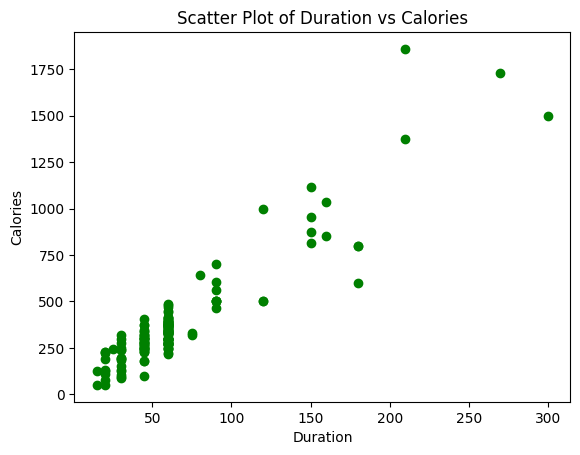

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data.csv')

# Basic statistical description
print("Basic Statistical Description:")
print(data.describe())

# Check for null values
print("\nNull values before replacement:")
print(data.isnull().sum())

# Replace null values with the mean
data.fillna(data.mean(), inplace=True)
print("\nNull values after replacement:")
print(data.isnull().sum())

# Aggregation for 'Duration' and 'Calories'
aggregated_data = data[['Duration', 'Calories']].agg(['min', 'max', 'count', 'mean'])
print("\nAggregated Data:")
print(aggregated_data)

# Filter rows with Calories between 500 and 1000
filtered_calories = data[(data['Calories'] >= 500) & (data['Calories'] <= 1000)]
print("\nRows with Calories between 500 and 1000:")
print(filtered_calories)

# Filter rows with Calories > 500 and Pulse < 100
filtered_pulse = data[(data['Calories'] > 500) & (data['Pulse'] < 100)]
print("\nRows with Calories > 500 and Pulse < 100:")
print(filtered_pulse)

# Create a new dataframe excluding the 'Maxpulse' column
df_modified = data.drop(columns=['Maxpulse'])
print("\nModified DataFrame without 'Maxpulse':")
print(df_modified.head())

# Delete 'Maxpulse' from the main dataframe
data.drop(columns=['Maxpulse'], inplace=True)

# Convert the Calories column to int
data['Calories'] = data['Calories'].astype(int)

# Scatter plot for 'Duration' and 'Calories'
plt.scatter(data['Duration'], data['Calories'], color='green')
plt.title('Scatter Plot of Duration vs Calories')
plt.xlabel('Duration')
plt.ylabel('Calories')
plt.show()


Mean Squared Error: 35301898.887134895


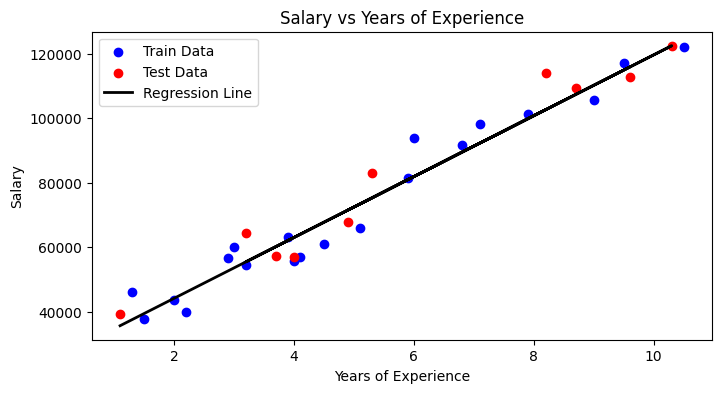

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Import the dataset
salary_data = pd.read_csv('Salary_Data.csv')

# Split the data into train and test partitions
X = salary_data[['YearsExperience']]
y = salary_data['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the train and test data using scatter plot
plt.figure(figsize=(8, 4))

# Scatter plot for the training data
plt.scatter(X_train, y_train, color='blue', label='Train Data')

# Scatter plot for the test data
plt.scatter(X_test, y_test, color='red', label='Test Data')

# Plot the regression line
plt.plot(X_test, y_pred, color='black', linewidth=2, label='Regression Line')

plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()
